In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [5]:
#referentiel base source
source_portfolio=pd.read_csv('base_source_enrichie.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_portfolio.shape

C:\Users\chris\AppData\Local\Temp\ipykernel_13164\3196077007.py:2: DtypeWarning: Columns (5,24,66,77) have mixed types. Specify dtype option on import or set low_memory=False.
  source_portfolio=pd.read_csv('base_source_enrichie.csv', encoding='utf-8', sep=',', on_bad_lines='skip')


(8500, 385)

In [6]:

source_portfolio_Mouchet = source_portfolio[source_portfolio['siren']==408627354]
source_portfolio_Mouchet

,Unnamed: 0,estimated_revenue_estimated_revenue_2020,instagram_url,ape_code,indeed_about_content,banking_data_solde_credit_equipement,net_result_2018,cartography_liens_entreprises_personnes,derniere_mise_a_jour_rcs,banking_data_bdf_score,...,current_liabilities_sum,revenue_sum,net_debt_sum,gross_operating_ebitda_sum,pdm,pdm_2018,pdm_2019,pdm_2020,pdm_2021,pdm_2022
5127,5127,56872899.0,NaN,4110C,NaN,NaN,3605589.0,", , , , , , , , , , , , , , , , , , , , , , , ...",2023-09-15,NaN,...,-15301860.0,3.369285e+08,450727007.4,1.739331e+07,0.20918,0.180204,0.298429,0.175097,0.182104,0.8729


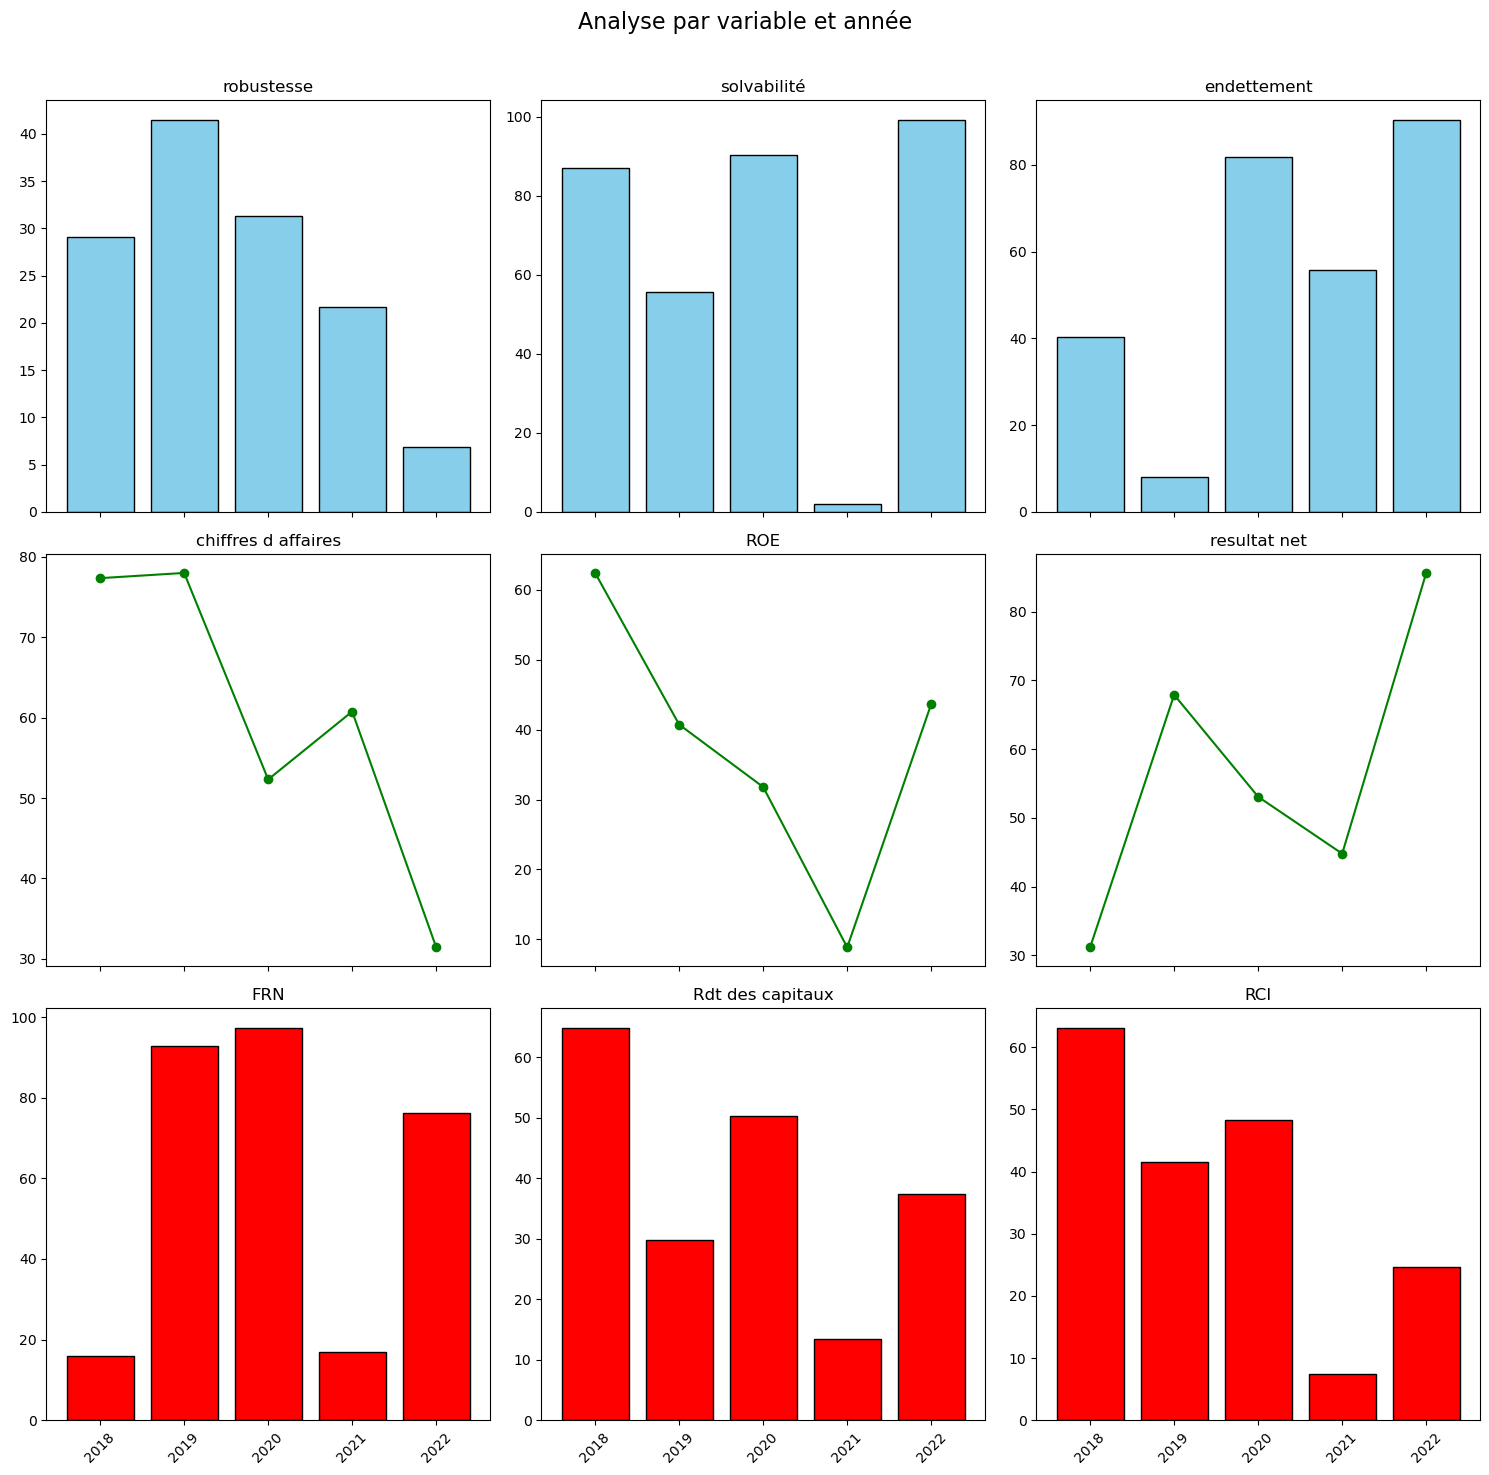

In [7]:
# Définir les années pour lesquelles les données sont générées
annees=['2018','2019','2020','2021','2022']
donnees = [
    [source_portfolio_Mouchet.loc[:, 'robustness_ratio_' + str(year)].dropna().tolist() for year in annees],
    [source_portfolio_Mouchet.loc[:, 'solvability_ratio_' + str(year)].dropna().tolist() for year in annees],
    [source_portfolio_Mouchet.loc[:, 'reimbursement_ratio_' + str(year)].dropna().tolist() for year in annees],
    [source_portfolio_Mouchet.loc[:, 'revenue_' + str(year)].dropna().tolist() for year in annees],
    [source_portfolio_Mouchet.loc[:, 'resultat_d_exploitation_' + str(year)].dropna().tolist() for year in annees],
    [source_portfolio_Mouchet.loc[:, 'net_result_' + str(year)].dropna().tolist() for year in annees],
    [source_portfolio_Mouchet.loc[:, 'FRN_' + str(year)].dropna().tolist() for year in annees],
    [source_portfolio_Mouchet.loc[:, 'RdtCpx_' + str(year)].dropna().tolist() for year in annees],
    [source_portfolio_Mouchet.loc[:, 'RCI_' + str(year)].dropna().tolist() for year in annees],
]


# Définir les années pour lesquelles les données sont générées
annees = np.arange(2018, 2023)
largeur_barre = 0.35  # Largeur des barres pour le graphique

# Noms des variables / data pour chaque subplot (9 pour une grille 3x3)
noms_variables = ['robustesse', 'solvabilité', 'endettement', 'chiffres d affaires', 'ROE', 'resultat net', 'FRN', 'Rdt des capitaux', 'RCI']

# Structure des données (exemple basé sur des données simulées)
donnees = [
    [np.random.rand() * 100 for year in annees] for _ in range(9)
]

# Créer une figure et une grille de subplots 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), sharex=True, sharey=False)

# Titre général pour la figure
fig.suptitle('Analyse par variable et année', fontsize=16)

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        idx = i * 3 + j  # Index pour accéder aux noms_variables et données
        data_to_plot = donnees[idx]  # Sélection des données pour la variable courante
        
        # Ajustement en fonction du type de graphique
        if i == 0:  # Première ligne: graphiques à barres
            ax.bar(annees, data_to_plot, color='skyblue', edgecolor='black')
        elif i == 1:  # Deuxième ligne: graphiques linéaires
            ax.plot(annees, data_to_plot, marker='o', linestyle='-', color='green')
        elif i == 2:  # Troisième ligne: diagrammes de dispersion
            ax.bar(annees, data_to_plot, color='red', edgecolor='black')
        
        ax.set_title(noms_variables[idx])
        ax.set_xticks(annees)
        ax.set_xticklabels(annees, rotation=45)

# Ajustement de l'espacement
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Afficher la figure
plt.show()

In [8]:
data = {
    'Variable': ['Robustesse', 'Solvabilité', 'Endettement', 'Chiffre d\'affaire', 'Résultat d\'exploitation', 'Résultat net', 'FRN', 'RdtCpx', 'RCI'],
    '2018': [source_portfolio_Mouchet['robustness_ratio_2018'].tolist(), source_portfolio_Mouchet['solvability_ratio_2018'].tolist(),source_portfolio_Mouchet['reimbursement_ratio_2018'].tolist(),source_portfolio_Mouchet['revenue_2018'].tolist(),source_portfolio_Mouchet['resultat_d_exploitation_2018'].tolist(),source_portfolio_Mouchet['net_result_2018'].tolist(),source_portfolio_Mouchet['FRN_2018'].tolist(),source_portfolio_Mouchet['RdtCpx_2018'].tolist(),source_portfolio_Mouchet['RCI_2018'].tolist()],
    '2019': [source_portfolio_Mouchet['robustness_ratio_2019'].tolist(), source_portfolio_Mouchet['solvability_ratio_2019'].tolist(),source_portfolio_Mouchet['reimbursement_ratio_2019'].tolist(),source_portfolio_Mouchet['revenue_2019'].tolist(),source_portfolio_Mouchet['resultat_d_exploitation_2019'].tolist(),source_portfolio_Mouchet['net_result_2019'].tolist(),source_portfolio_Mouchet['FRN_2019'].tolist(),source_portfolio_Mouchet['RdtCpx_2019'].tolist(),source_portfolio_Mouchet['RCI_2019'].tolist()],
    '2020': [source_portfolio_Mouchet['robustness_ratio_2020'].tolist(), source_portfolio_Mouchet['solvability_ratio_2020'].tolist(),source_portfolio_Mouchet['reimbursement_ratio_2020'].tolist(),source_portfolio_Mouchet['revenue_2020'].tolist(),source_portfolio_Mouchet['resultat_d_exploitation_2020'].tolist(),source_portfolio_Mouchet['net_result_2020'].tolist(),source_portfolio_Mouchet['FRN_2020'].tolist(),source_portfolio_Mouchet['RdtCpx_2020'].tolist(),source_portfolio_Mouchet['RCI_2020'].tolist()],
    '2021': [source_portfolio_Mouchet['robustness_ratio_2021'].tolist(), source_portfolio_Mouchet['solvability_ratio_2021'].tolist(),source_portfolio_Mouchet['reimbursement_ratio_2021'].tolist(),source_portfolio_Mouchet['revenue_2021'].tolist(),source_portfolio_Mouchet['resultat_d_exploitation_2021'].tolist(),source_portfolio_Mouchet['net_result_2021'].tolist(),source_portfolio_Mouchet['FRN_2021'].tolist(),source_portfolio_Mouchet['RdtCpx_2021'].tolist(),source_portfolio_Mouchet['RCI_2021'].tolist()],
    '2022': [source_portfolio_Mouchet['robustness_ratio_2022'].tolist(), source_portfolio_Mouchet['solvability_ratio_2022'].tolist(),source_portfolio_Mouchet['reimbursement_ratio_2022'].tolist(),source_portfolio_Mouchet['revenue_2022'].tolist(),source_portfolio_Mouchet['resultat_d_exploitation_2022'].tolist(),source_portfolio_Mouchet['net_result_2022'].tolist(),source_portfolio_Mouchet['FRN_2022'].tolist(),source_portfolio_Mouchet['RdtCpx_2022'].tolist(),source_portfolio_Mouchet['RCI_2022'].tolist()]

}

# Créer un DataFrame pour résumer les données
summary_df = pd.DataFrame(data)

# Afficher le DataFrame résumé
print(summary_df)

                  Variable                  2018                  2019  \
0               Robustesse  [0.0723839421748987]  [0.1559600467757249]   
1              Solvabilité   [4.343433953300136]  [1.4893767094823416]   
2              Endettement   [3.370342506730481]  [0.5028843242910186]   
3        Chiffre d'affaire          [49812001.0]         [103611863.0]   
4  Résultat d'exploitation           [4088309.0]          [22492921.0]   
5             Résultat net           [3605589.0]          [16159311.0]   
6                      FRN          [38002139.0]          [13470344.0]   
7                   RdtCpx  [0.3172202671077405]  [0.5870667033211482]   
8                      RCI  [0.0948785803872776]  [1.1996212568884654]   

                   2020                  2021                  2022  
0  [0.1044700569949845]  [0.0094827525178964]  [0.3118260542969271]  
1  [1.8125921914902148]   [5.925563359532255]  [1.5299879200873725]  
2  [0.8233064934812699]   [4.956344500177959]  [0

In [9]:
source_portfolio_Mouchet['equity']
source_portfolio_Mouchet['net_debt']

5127    30352329.6
Name: net_debt, dtype: float64

In [10]:
for col in summary_df.columns:
    if col != 'Variable':  # Ignorer la colonne 'Variable'
        summary_df[col] = summary_df[col].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)

# Appliquer une mise en forme conditionnelle
styled_df = summary_df.style.applymap(lambda x: 'color: red' if isinstance(x, str) and 'Résultat' in x else 'color: black').format("{:,.2f}", na_rep="N/A", subset=pd.IndexSlice[:, '2018':'2022']).background_gradient(cmap='viridis', subset=pd.IndexSlice[:, '2018':'2022'])

# Afficher le DataFrame stylisé
styled_df

,Variable,2018,2019,2020,2021,2022
0,Robustesse,0.07,0.16,0.10,0.01,0.31
1,Solvabilité,4.34,1.49,1.81,5.93,1.53
2,Endettement,3.37,0.50,0.82,4.96,0.54
3,Chiffre d'affaire,"49,812,001.00","103,611,863.00","56,872,899.00","58,904,627.00","83,192,811.00"
4,Résultat d'exploitation,"4,088,309.00","22,492,921.00","8,564,590.00","974,199.00","36,116,821.00"
5,Résultat net,"3,605,589.00","16,159,311.00","5,941,515.00","558,578.00","25,941,686.00"
6,FRN,"38,002,139.00","13,470,344.00","27,195,044.00","52,006,940.00","19,344,699.00"
7,RdtCpx,0.32,0.59,0.18,0.05,0.71
8,RCI,0.09,1.20,0.22,0.01,1.34
